# Notebook preparation

In [1]:
import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import DateFormatter
from fbprophet import Prophet

# Time series forcasting with Prophet

In [2]:
# get data from csv
infos = pd.read_csv('../data/infos.csv', sep='|')
items = pd.read_csv('../data/items.csv', sep='|')
orders = pd.read_csv('../data/orders.csv', sep='|')
orders['time'] = pd.to_datetime(orders.time)
orders['time'] = orders['time'].dt.strftime('%Y-%m-%d')

In [3]:
# aggregate 'order' and 'salesPrice' per day per product
agg_orders = orders.groupby(['itemID', 'time']).agg({'order': 'sum', 'salesPrice': 'sum'})

# aggregate 'order' and 'salesPrice' per week per product
orders_weekly = orders.copy()
orders_weekly['week'] = orders_weekly['time'].astype(np.datetime64).dt.week
agg_orders_weekly = orders_weekly.groupby(['itemID', 'week']).agg({'order': 'sum', 'salesPrice': 'sum'})

# aggregate 'order' and 'salesPrice' per day
agg_orders_all = orders.groupby(['time']).agg({'order': 'sum', 'salesPrice': 'sum'})

In [4]:
# data preparation (daily forcast)
item = agg_orders.loc[672]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)
item = item.reset_index()
item = item.drop(['salesPrice'], axis=1)
item.columns = ['ds', 'y']
item.head()

,ds,y
0,2018-01-01,0
1,2018-01-02,0
2,2018-01-03,0
3,2018-01-04,0
4,2018-01-05,0


In [5]:
# create and fit model
m1 = Prophet()
m1.fit(item)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


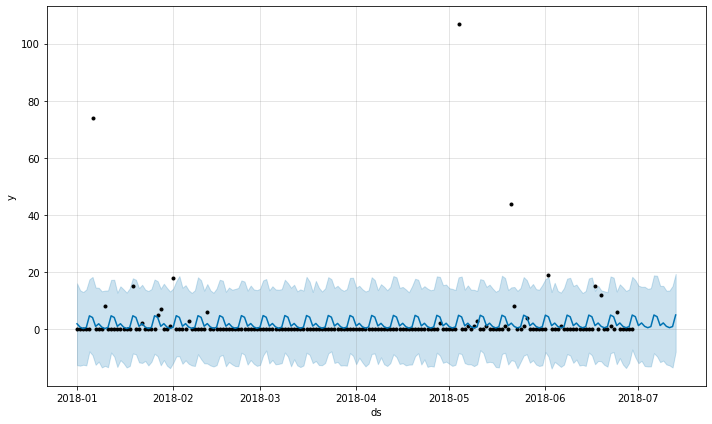

In [6]:
# make prediction for 14 days and plot result
future = m1.make_future_dataframe(periods=14)
forecast = m1.predict(future)
fig1 = m1.plot(forecast)

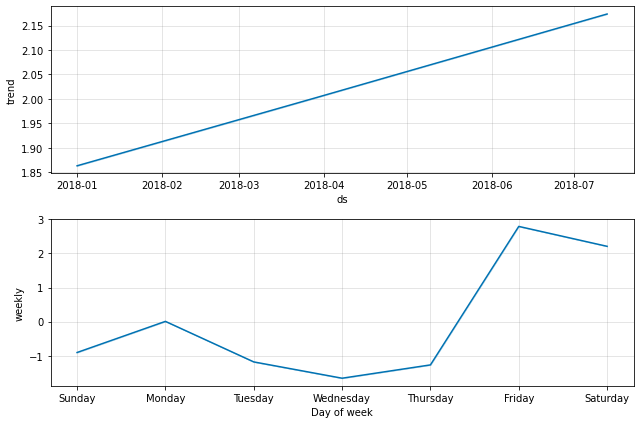

In [7]:
# plot prediction components
fig2 = m1.plot_components(forecast)

In [23]:
# data preparation (weekly forcast)
item = agg_orders_weekly.copy()
item = item.loc[7789]
idx = pd.RangeIndex(start=1, stop=27, step=1)
item = item.reindex(idx, fill_value=0)
date_idx = pd.date_range('2018-01-01', '2018-06-29', freq ='7D')
item.index = date_idx
item.index = pd.to_datetime(item.index)
item = item.reset_index()
item = item.drop(['salesPrice'], axis=1)
item.columns = ['ds', 'y']
item.head()

,ds,y
0,2018-01-01,629
1,2018-01-08,79
2,2018-01-15,54
3,2018-01-22,9
4,2018-01-29,27


In [24]:
m2 = Prophet(yearly_seasonality=True)
m2.fit(item)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


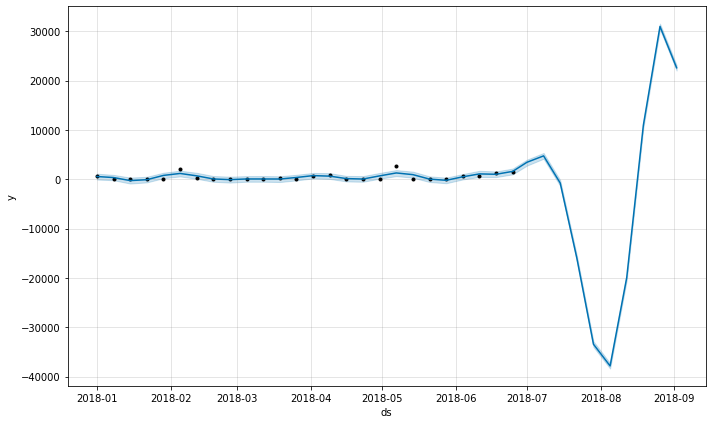

In [28]:
# make prediction for 2 weeks and plot result
future = m2.make_future_dataframe(periods=10, freq='W')
forecast = m2.predict(future)
fig1 = m2.plot(forecast)

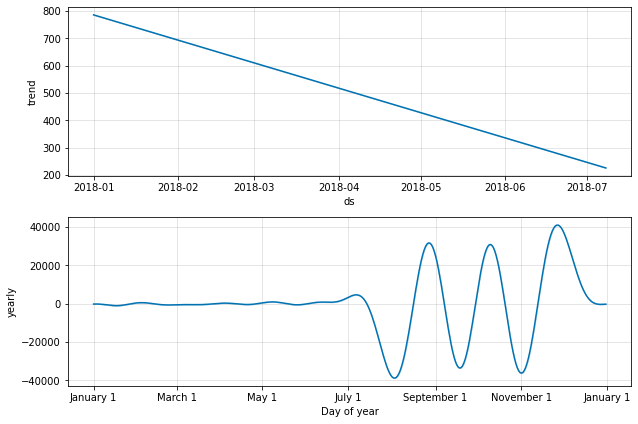

In [26]:
# plot prediction components
fig2 = m2.plot_components(forecast)

In [12]:
# TODO: association rule mining (which products are purchased together?)

In [13]:
# TODO: Croston forecast model for intermittent demand